In [1]:
!pip uninstall -y patsy statsmodels seaborn
!pip install patsy==0.5.6 statsmodels==0.14.2 seaborn==0.13.2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/heart.csv")
df.head()
df.shape
df.info()
df.describe()
df.isnull().sum()
df.dtypes

Found existing installation: patsy 0.5.6
Uninstalling patsy-0.5.6:
  Successfully uninstalled patsy-0.5.6
Found existing installation: statsmodels 0.14.2
Uninstalling statsmodels-0.14.2:
  Successfully uninstalled statsmodels-0.14.2
Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached statsmodels-0.14.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)
Using cached statsmodels-0.14.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.7 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       30

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


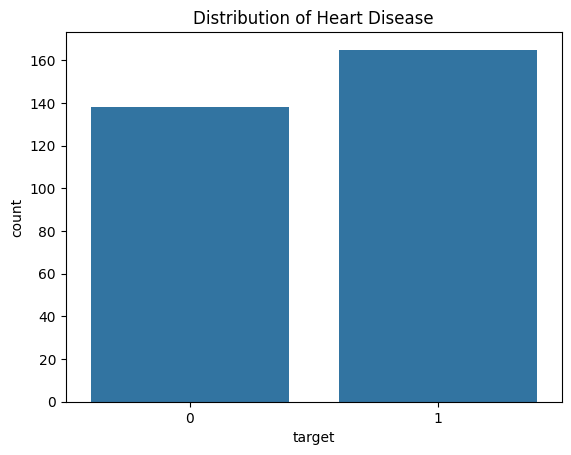

,count
target,
1,165
0,138


In [2]:
sns.countplot(x='target', data=df)
plt.title("Distribution of Heart Disease")
plt.show()

df['target'].value_counts()

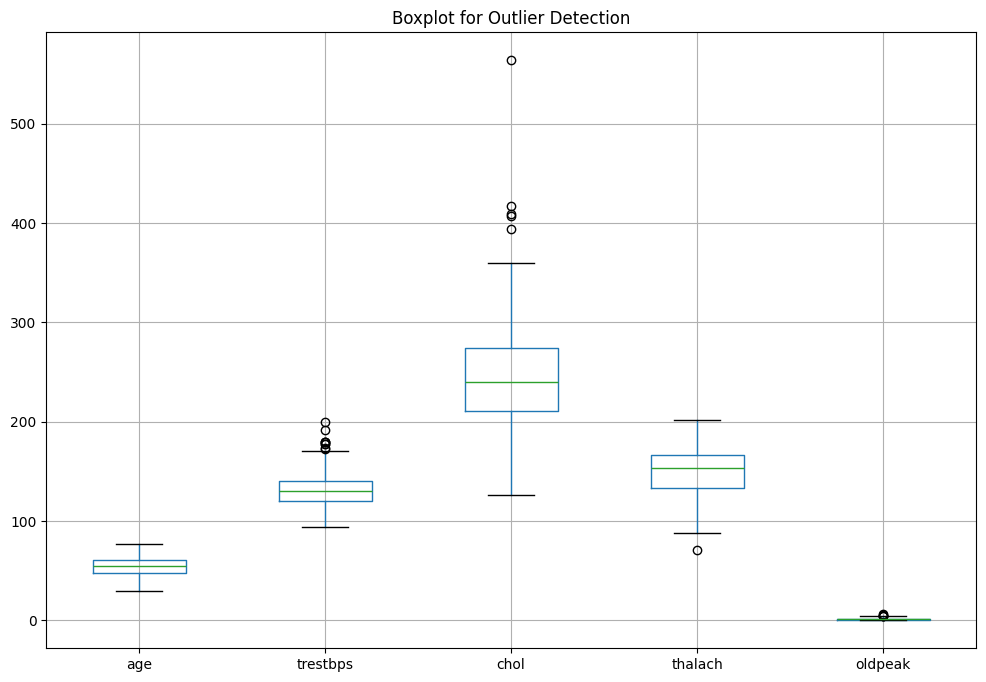

In [3]:
plt.figure(figsize=(12,8))
df[['age','trestbps','chol','thalach','oldpeak']].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.show()

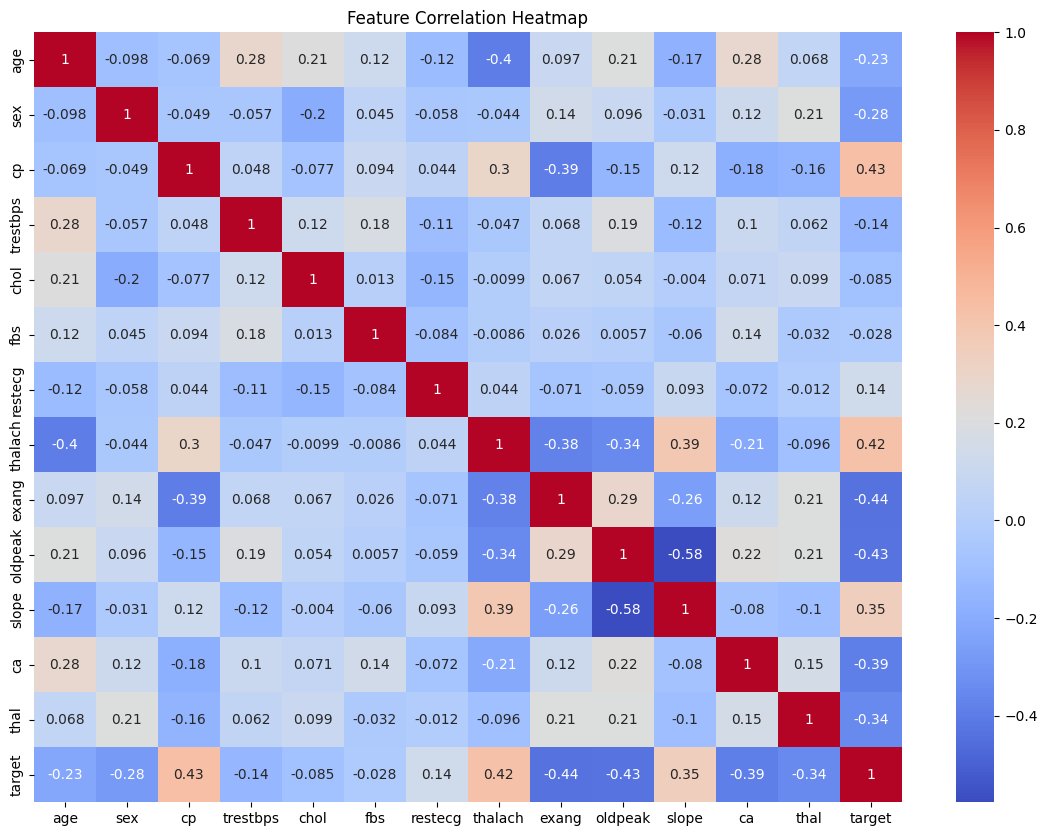

In [4]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Since the dataset contains no missing values, consistent encodings, and medically meaningful outliers, no data removal or imputation was performed. This preserves the integrity of patient information for the machine learning models.

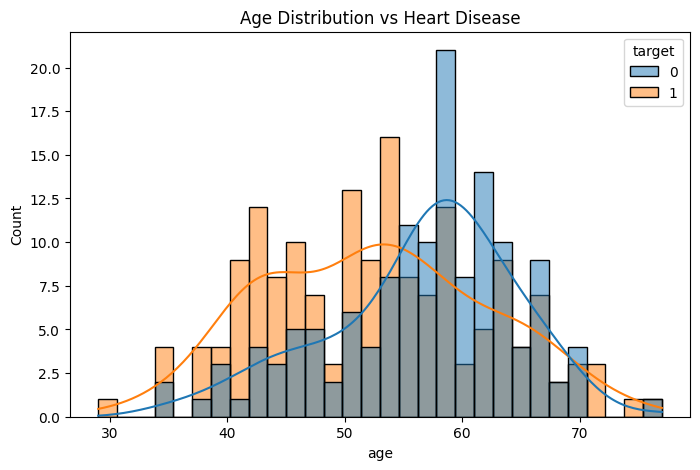

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', hue='target', kde=True, bins=30)
plt.title("Age Distribution vs Heart Disease")
plt.show()

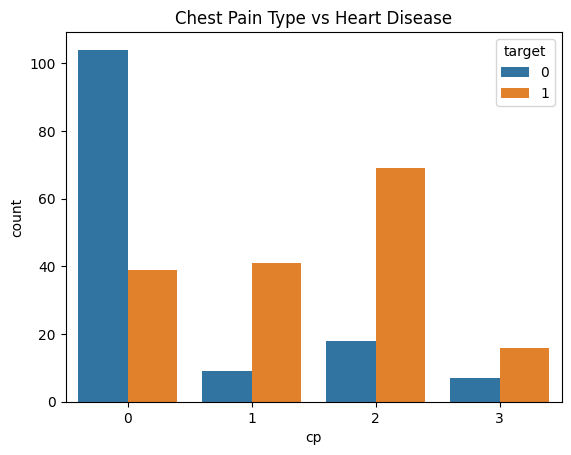

In [7]:
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

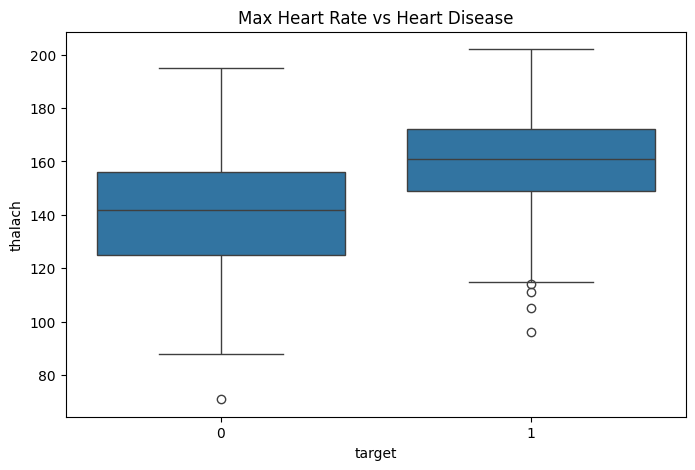

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x='target', y='thalach', data=df)
plt.title("Max Heart Rate vs Heart Disease")
plt.show()

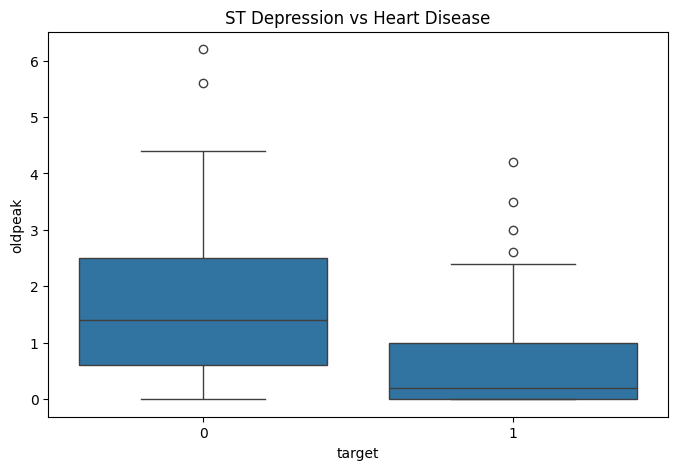

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x='target', y='oldpeak', data=df)
plt.title("ST Depression vs Heart Disease")
plt.show()

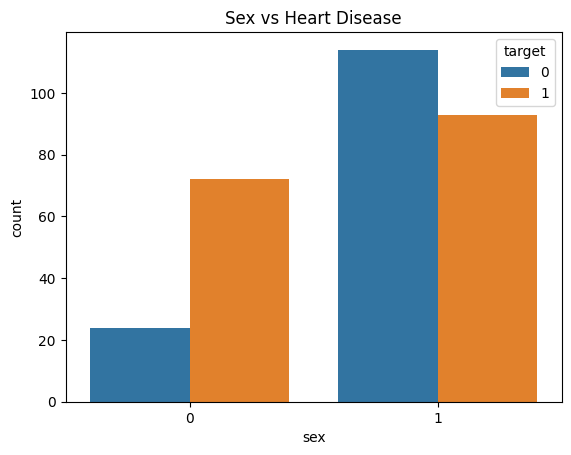

In [10]:
sns.countplot(x='sex', hue='target', data=df)
plt.title("Sex vs Heart Disease")
plt.show()

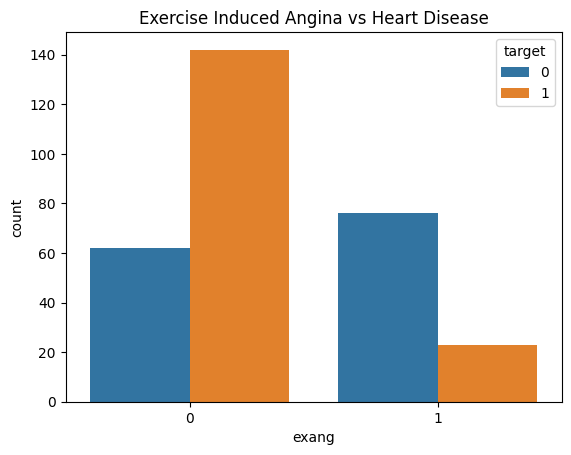

In [11]:
sns.countplot(x='exang', hue='target', data=df)
plt.title("Exercise Induced Angina vs Heart Disease")
plt.show()

Exploratory analysis reveals that chest pain type, maximum heart rate, ST depression, exercise-induced angina, age, and sex have strong relationships with heart disease presence. These insights indicate that the dataset captures clinically meaningful indicators that will aid effective model training.

In [12]:
X = df.drop('target', axis=1)
y = df['target']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

params = {
    'max_depth': [3,5,7,9],
    'min_samples_split': [2,5,10]
}

grid_dt = GridSearchCV(dt, params, cv=5)
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

params_rf = {
    'n_estimators': [100,200],
    'max_depth': [5,7,9]
}

grid_rf = GridSearchCV(rf, params_rf, cv=5)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, verbose=0)

y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype("int32")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step



📊 Logistic Regression Performance
Accuracy : 0.8032786885245902
Precision: 0.7692307692307693
Recall   : 0.9090909090909091
F1 Score : 0.8333333333333334
ROC-AUC  : 0.7938311688311689

Confusion Matrix:
 [[19  9]
 [ 3 30]]

📊 Decision Tree Performance
Accuracy : 0.7540983606557377
Precision: 0.75
Recall   : 0.8181818181818182
F1 Score : 0.782608695652174
ROC-AUC  : 0.7483766233766235

Confusion Matrix:
 [[19  9]
 [ 6 27]]

📊 Random Forest Performance
Accuracy : 0.8360655737704918
Precision: 0.7804878048780488
Recall   : 0.9696969696969697
F1 Score : 0.8648648648648649
ROC-AUC  : 0.8241341991341993

Confusion Matrix:
 [[19  9]
 [ 1 32]]

📊 Neural Network Performance
Accuracy : 0.7704918032786885
Precision: 0.7435897435897436
Recall   : 0.8787878787878788
F1 Score : 0.8055555555555556
ROC-AUC  : 0.7608225108225107

Confusion Matrix:
 [[18 10]
 [ 4 29]]


<Figure size 800x600 with 0 Axes>

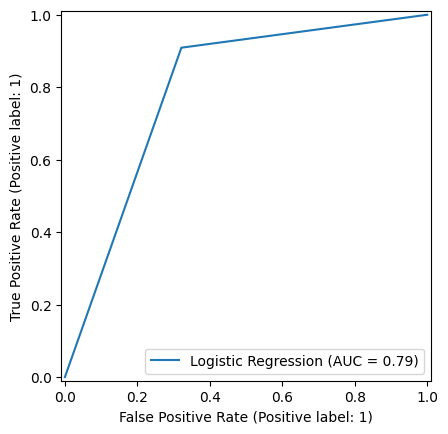

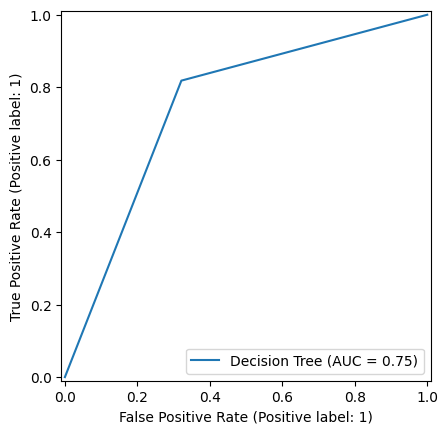

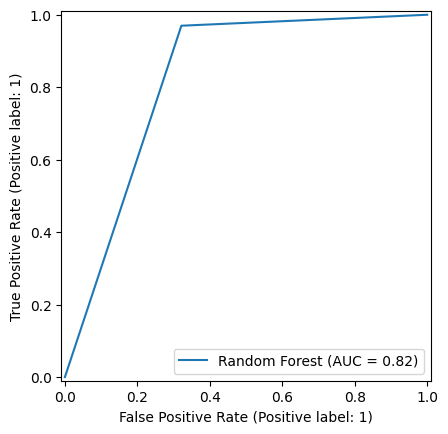

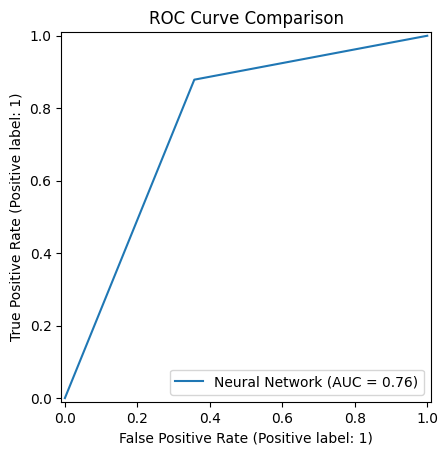

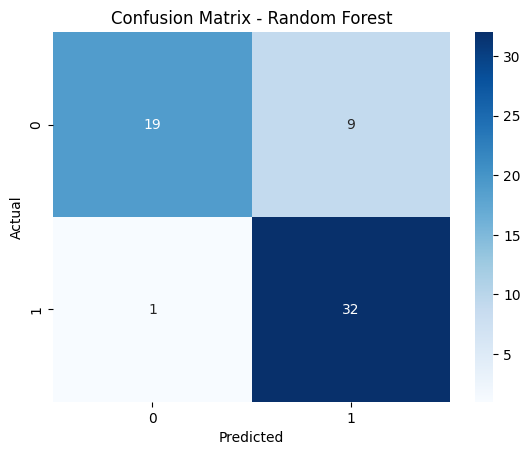

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
def evaluate_model(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    print(f"\n📊 {model_name} Performance")
    print("Accuracy :", acc)
    print("Precision:", pre)
    print("Recall   :", rec)
    print("F1 Score :", f1)
    print("ROC-AUC  :", auc)

    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

    return [model_name, acc, pre, rec, f1, auc]
results = []

results.append(evaluate_model(y_test, y_pred_lr, "Logistic Regression"))
results.append(evaluate_model(y_test, y_pred_dt, "Decision Tree"))
results.append(evaluate_model(y_test, y_pred_rf, "Random Forest"))
results.append(evaluate_model(y_test, y_pred_nn, "Neural Network"))
results_df = pd.DataFrame(results, columns=[
    "Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"
])

results_df
plt.figure(figsize=(8,6))

RocCurveDisplay.from_predictions(y_test, y_pred_lr, name="Logistic Regression")
RocCurveDisplay.from_predictions(y_test, y_pred_dt, name="Decision Tree")
RocCurveDisplay.from_predictions(y_test, y_pred_rf, name="Random Forest")
RocCurveDisplay.from_predictions(y_test, y_pred_nn, name="Neural Network")

plt.title("ROC Curve Comparison")
plt.show()
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

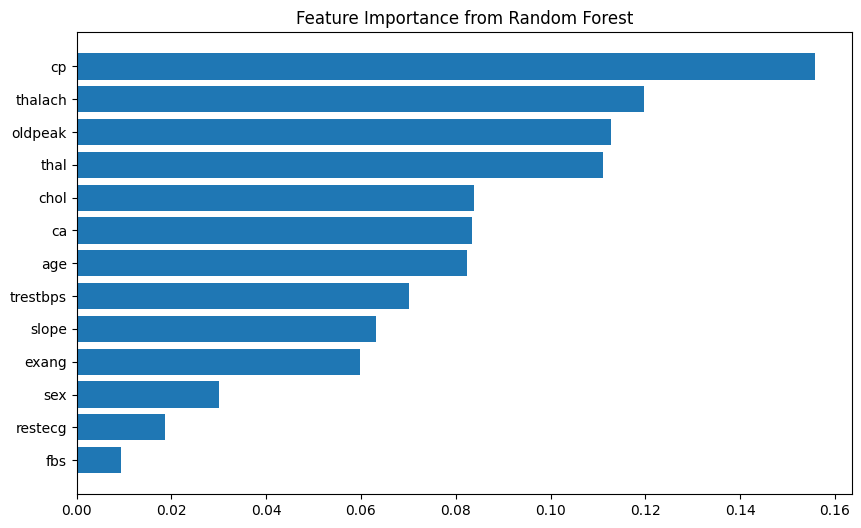

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance from Random Forest")
plt.show()

Feature importance analysis using the Random Forest model reveals that chest pain type (cp), maximum heart rate achieved (thalach), ST depression (oldpeak), and number of major vessels (ca) are the most influential predictors of heart disease.

Chest pain type is a primary symptom used by cardiologists during diagnosis, which explains its high importance. Maximum heart rate reflects cardiac performance under stress, while ST depression indicates exercise-induced abnormalities in heart function. The number of major vessels colored by fluoroscopy (ca) provides insight into arterial blockage, a direct indicator of heart disease.

These findings align with established medical knowledge, validating that the model has learned clinically meaningful patterns rather than random correlations.

In [16]:
feature_importance.head(5)

,Feature,Importance
2,cp,0.155787
7,thalach,0.119769
9,oldpeak,0.112743
12,thal,0.111051
4,chol,0.083801


In [25]:
import joblib

joblib.dump(best_rf, "heart_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [20]:
!pip install streamlit pyngrok

In [21]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib

model = joblib.load("heart_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("Heart Disease Risk Prediction System")
st.write("Enter patient details:")

age = st.number_input("Age", 20, 100)
sex = st.selectbox("Sex (0 = Female, 1 = Male)", [0,1])
cp = st.selectbox("Chest Pain Type (0-3)", [0,1,2,3])
trestbps = st.number_input("Resting Blood Pressure")
chol = st.number_input("Cholesterol")
fbs = st.selectbox("Fasting Blood Sugar > 120 (0/1)", [0,1])
restecg = st.selectbox("Rest ECG (0-2)", [0,1,2])
thalach = st.number_input("Max Heart Rate Achieved")
exang = st.selectbox("Exercise Induced Angina (0/1)", [0,1])
oldpeak = st.number_input("ST Depression")
slope = st.selectbox("Slope (0-2)", [0,1,2])
ca = st.selectbox("Number of Major Vessels (0-4)", [0,1,2,3,4])
thal = st.selectbox("Thalassemia (0-3)", [0,1,2,3])

input_data = np.array([[age, sex, cp, trestbps, chol, fbs,
                        restecg, thalach, exang, oldpeak,
                        slope, ca, thal]])

input_scaled = scaler.transform(input_data)

if st.button("Predict"):
    prediction = model.predict(input_scaled)[0]

    if prediction == 1:
        st.error("High Risk of Heart Disease")
    else:
        st.success("Low Risk of Heart Disease")

Writing app.py


In [22]:
!streamlit run app.py &>/content/logs.txt &

In [24]:
from pyngrok import ngrok

ngrok.set_auth_token("39D9fB6gsFF7zILtRvejdYseIBF_73ooDWXhguBM84V2wJajj")
public_url = ngrok.connect(8501)
public_url

<NgrokTunnel: "https://joeann-perkier-emma.ngrok-free.dev" -> "http://localhost:8501">